In [1]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/PSOSM

/content/drive/MyDrive/PSOSM


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.graph_objects as gone
from textblob import TextBlob
from sklearn.ensemble import RandomForestRegressor
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import nltk
import pickle
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
red_df = pd.read_pickle('redditDataset.pkl')
dist=red_df.drop_duplicates()
distarr = dist.to_numpy()
print(distarr.shape)
np1 = []
ns = []
hp = []
hs = []
humort = ""
newst = ""
for i in distarr:
  if(i[1]=='humor'):
    humort = str(i[0]) + " " + humort
    temp = TextBlob(i[0]).sentiment
    hp.append(temp[0])
    hs.append(temp[1])
  else:
    newst = str(i[0]) + " " + newst
    temp = TextBlob(i[0]).sentiment
    np1.append(temp[0])
    ns.append(temp[1])
print(np1)
print(ns)
print(hp)
print(hs)

(3651, 2)
[0.0625, 0.1950892857142857, 0.253968253968254, 0.07999999999999999, 0.016666666666666663, -0.07500000000000001, 0.5, -0.2, 0.20972222222222223, 0.15, 0.0, 0.0, 0.03393939393939394, 0.23464285714285715, -0.3, 0.0, 0.26190476190476186, 0.075, 0.375, -0.07999999999999999, 0.36666666666666664, 0.2, 0.11428571428571431, -0.22000000000000003, 0.375, 0.2857142857142857, -0.15555555555555559, 0.024999999999999994, 0.25, -0.0625, -0.06666666666666667, 0.2833333333333333, 0.175, 0.0, -0.125, 0.33333333333333337, 0.4, 0.175, 0.3, 0.0, 0.0, -0.14375, 0.2857142857142857, 0.5, -0.20833333333333334, 0.0, 0.125, 0.0, -0.1, -0.20555555555555557, 0.2, -0.18333333333333335, -0.121875, 0.2333333333333333, -0.09999999999999999, 0.8, -0.028571428571428564, 0.0, 0.24666666666666665, 0.2, 0.075, 0.05499999999999999, -0.12777777777777777, -0.10000000000000002, 0.15357142857142855, 0.125, 0.25, 0.8, 0.0, 0.0, 0.17333333333333334, -0.2571428571428572, 0.06666666666666667, 0.15281385281385282, 0.099999

Text(0.5, 1.0, 'Plot of humor polrity text')

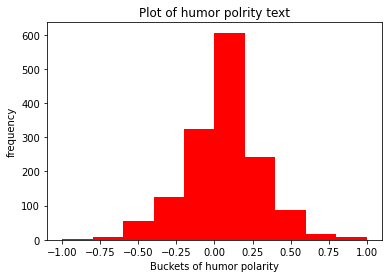

In [6]:
plt.hist(hp, bins = 10, color = 'r')
plt.xlabel("Buckets of humor polarity")
plt.ylabel("frequency")
plt.title("Plot of humor polrity text")

Text(0.5, 1.0, 'Plot of humor subjectivity text')

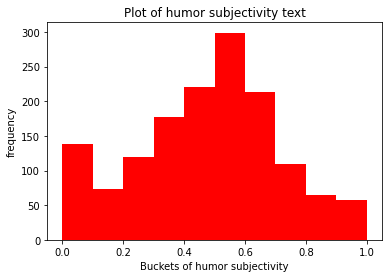

In [7]:
plt.hist(hs, bins = 10, color = 'r')
plt.xlabel("Buckets of humor subjectivity")
plt.ylabel("frequency")
plt.title("Plot of humor subjectivity text")

Text(0.5, 1.0, 'Plot of news polarity text')

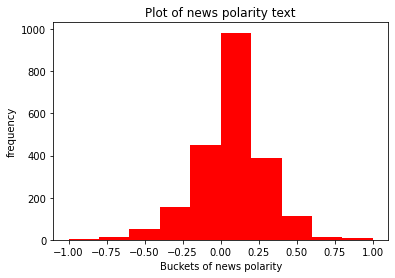

In [8]:
plt.hist(np1, bins = 10, color = 'r')
plt.xlabel("Buckets of news polarity")
plt.ylabel("frequency")
plt.title("Plot of news polarity text")

Text(0.5, 1.0, 'Plot of news subjectivity text')

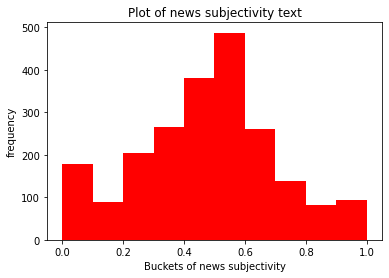

In [9]:
plt.hist(ns, bins = 10, color = 'r')
plt.xlabel("Buckets of news subjectivity")
plt.ylabel("frequency")
plt.title("Plot of news subjectivity text")

In [10]:
hp1 = np.array(hp)
print("Mean of polarity humor: ",np.mean(hp1))
print("Standard Deviation of polarity humor: ",np.std(hp1));

Mean of polarity humor:  0.05158728575619279
Standard Deviation of polarity humor:  0.24866391452327927


In [11]:
hs1 = np.array(hs)
print("Mean of subjectivity humor: ",np.mean(hs1))
print("Standard Deviation of subjectivity humor: ",np.std(hs1));

Mean of subjectivity humor:  0.47140332998753287
Standard Deviation of subjectivity humor:  0.24269324821277793


In [12]:
np11 = np.array(np1)
print("Mean of polarity news: ",np.mean(np11))
print("Standard Deviation of polarity news: ",np.std(np11));

Mean of polarity news:  0.064048534801197
Standard Deviation of polarity news:  0.23041556585535447


In [13]:
ns1 = np.array(ns)
print("Mean of subjectivity humor: ",np.mean(ns1))
print("Standard Deviation of subjectivity humor: ",np.std(ns1));

Mean of subjectivity humor:  0.4704749753548112
Standard Deviation of subjectivity humor:  0.23274569397299044


In [14]:
# b
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
sw = stopwords.words('english')

# bigram

tokhum = []
for i in nltk.word_tokenize(humort):
  if(i not in sw):
    tokhum.append(i)
topbihum = nltk.FreqDist(nltk.bigrams(tokhum)).most_common(10)

toknew = []
for i in nltk.word_tokenize(newst):
  if(i not in sw):
    toknew.append(i)
topbinew = nltk.FreqDist(nltk.bigrams(toknew)).most_common(10)
print(topbinew)

# unigram

topunihum = nltk.FreqDist(tokhum).most_common(10)
topuninew = nltk.FreqDist(toknew).most_common(10)

# all lists

humbinum = []
humbist = []
humuninum = []
humunist = []
newbinum = []
newbist = []
newuninum = []
newunist = []

for i in topbihum:
  humbist.append(str(i[0]))
  humbinum.append(int(i[1]))

for i in topunihum:
  humunist.append(str(i[0]))
  humuninum.append(int(i[1]))

for i in topbinew:
  newbist.append(str(i[0]))
  newbinum.append(int(i[1]))

for i in topuninew:
  newunist.append(str(i[0]))
  newuninum.append(int(i[1]))

[(('ca', 'nt'), 81), (('wo', 'nt'), 42), (('nt', 'know'), 39), (('would', 'nt'), 36), (('nt', 'even'), 28), (('nt', 'want'), 26), (('bernie', 'sanders'), 24), (('submission', 'statement'), 21), (('could', 'nt'), 21), (('supreme', 'court'), 21)]


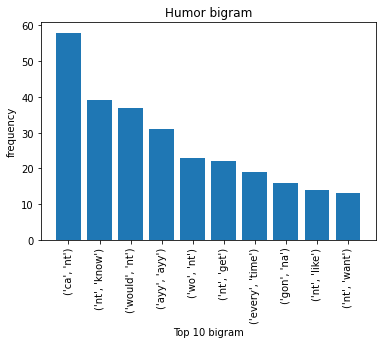

In [15]:
plt.bar(humbist,humbinum)
plt.xlabel("Top 10 bigram")
plt.ylabel("frequency")
plt.title("Humor bigram")
plt.xticks(rotation=90)
plt.show()

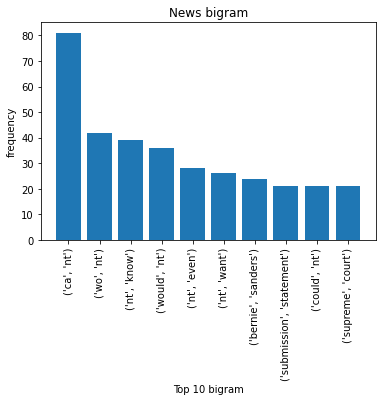

In [16]:
plt.bar(newbist,newbinum)
plt.xlabel("Top 10 bigram")
plt.ylabel("frequency")
plt.title("News bigram")
plt.xticks(rotation=90)
plt.show()

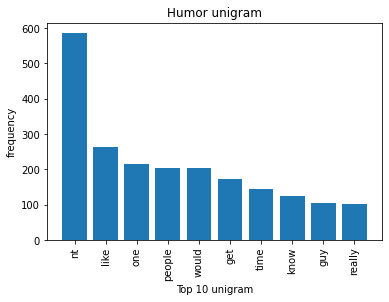

In [17]:
plt.bar(humunist,humuninum)
plt.xlabel("Top 10 unigram")
plt.ylabel("frequency")
plt.title("Humor unigram")
plt.xticks(rotation=90)
plt.show()

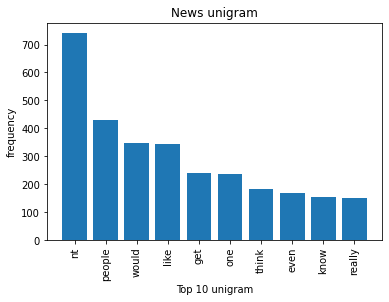

In [18]:
plt.bar(newunist,newuninum)
plt.xlabel("Top 10 unigram")
plt.ylabel("frequency")
plt.title("News unigram")
plt.xticks(rotation=90)
plt.show()

In [19]:
# Q2

In [20]:
# a

trainx = []
trainy =  []
# spliting data 70-30
for i in distarr:
  trainx.append(i[0])
  trainy.append(i[1])

xtrain,xtest,ytrain,ytest = train_test_split(trainx,trainy,test_size = 0.3, random_state = 1 )
vectorizer = CountVectorizer()
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
pred = mnb.predict(xtest)
confusion_matrix(ytest,pred)
print("Accuracy Score : "+str(accuracy_score(ytest,pred)))
print(confusion_matrix(ytest, mnb.predict(xtest)))

Accuracy Score : 0.8156934306569343
[[331 136]
 [ 66 563]]


In [21]:
classification_report(ytest,mnb.predict(xtest) )

'              precision    recall  f1-score   support\n\n       humor       0.83      0.71      0.77       467\n        news       0.81      0.90      0.85       629\n\n    accuracy                           0.82      1096\n   macro avg       0.82      0.80      0.81      1096\nweighted avg       0.82      0.82      0.81      1096\n'

In [22]:
pickle.dump(mnb, open('bess.sav', 'wb'))
mnb = pickle.load(open('bess.sav', 'rb'))